# "while(!(succeed=try( )));"

###  Author           : Yash Goswami

### Organization : The Sparks Foundation

### Domain          : Data Science & Business Analytics

### Task 1            : Prediction using Supervised ML 


# Importing Required Libraries of ML:

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Loading Dataset:

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data we already have:

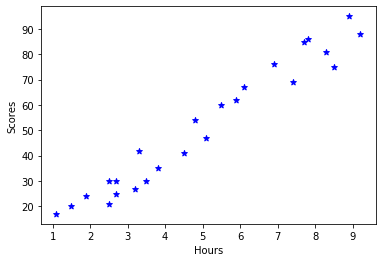

In [9]:
%matplotlib inline
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(df.Hours,df.Scores,color="blue",marker="*")

# Extract Dependent(Scores) & Independent(Hours) Variables:

In [19]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [22]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Train-Test Split:

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
print(x_train.shape)
print(x_test.shape)


(17, 1)
(8, 1)


In [28]:
x_test,y_test

(array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9],
        [3.8],
        [1.9],
        [7.8]]), array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64))

# Fitting Simple linear Regression Model:

In [36]:

re=LinearRegression()
re.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction for test sets:


In [40]:
x_pred=re.predict(x_train)
y_pred=re.predict(x_test)

# Visualizing training set result:

Text(0, 0.5, 'scores')

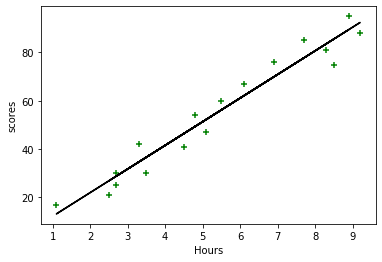

In [41]:
plt.scatter(x_train,y_train,color="green",marker="+")
plt.plot(x_train,x_pred,color="black")
plt.xlabel("Hours")
plt.ylabel("scores")

# Visualizing test set result:

Text(0, 0.5, 'scores')

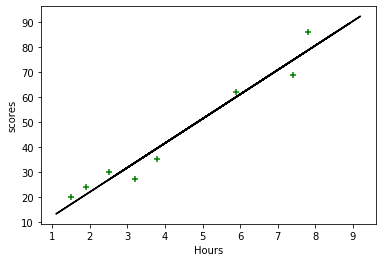

In [42]:
plt.scatter(x_test,y_test,color="green",marker="+")
plt.plot(x_train,x_pred,color="black")
plt.xlabel("Hours")
plt.ylabel("scores")

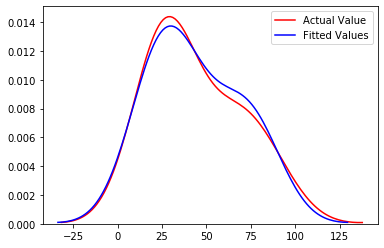

In [47]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


# What will be score if a  student studies for 9.25 hours daily? 

In [44]:
re.predict([[9.25]])

array([92.91505723])

# Evaluating Model:


In [46]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.metrics import r2_score
print("Model Evaluation:")
print("Mean Absolute Error:{}".format(mae(y_test,y_pred)))
print("Mean Squared Error:{}".format(mse(y_test,y_pred)))
print("Accuracy score:{}".format(r2_score(y_test,y_pred)))

Model Evaluation:
Mean Absolute Error:4.419727808027652
Mean Squared Error:22.96509721270043
Accuracy score:0.9568211104435257
